In [1]:
# Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Reading data

final_data = pd.read_csv('final_data.csv')
final_data.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [3]:
# Assign X (data) and y (target)

X = final_data.drop("diagnosis", axis=1)
y = final_data["diagnosis"]
print(X.shape, y.shape)

(569, 18) (569,)


In [4]:
# Split test and train datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.40)

In [5]:
# Scale your data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Develop logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9912023460410557
Testing Data Score: 0.9649122807017544


In [9]:
predictions = classifier.predict(X_test_scaled)
print(f"First 20 Predictions:   {predictions[:15]}")
print(f"First 20 Actual labels: {y_test[:15].tolist()}")

First 20 Predictions:   ['B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
First 20 Actual labels: ['B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [10]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, precision_score

print(classification_report(y_test, predictions, digits=3))

cfm = confusion_matrix(y_test, predictions)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.959     0.986     0.972       143
           M      0.975     0.929     0.952        85

    accuracy                          0.965       228
   macro avg      0.967     0.958     0.962       228
weighted avg      0.965     0.965     0.965       228

Confusion Matrix: 
 [[141   2]
 [  6  79]] 

True Negative: 141
False Positive: 2
False Negative: 6
True Positive: 79
Correct Predictions 96.5 %


Automatically created module for IPython interactive environment


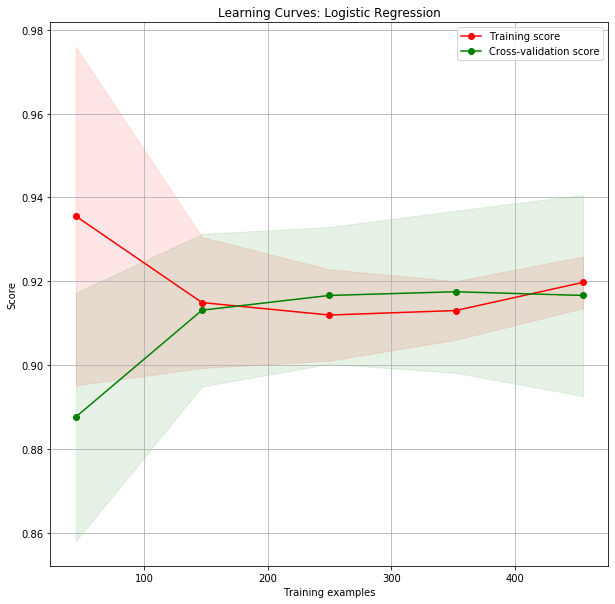

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
#from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves: Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

classifier = LogisticRegression()
plot_learning_curve(classifier, title, X, y, cv=cv, n_jobs=6)


# Save the plot
plt.savefig("Images/learning_gurve_logisticreg.png")

plt.show()

# kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

k: 1, Train/Test Score: 1.000/0.934
k: 3, Train/Test Score: 0.968/0.930
k: 5, Train/Test Score: 0.962/0.952
k: 7, Train/Test Score: 0.956/0.939
k: 9, Train/Test Score: 0.947/0.939
k: 11, Train/Test Score: 0.950/0.925
k: 13, Train/Test Score: 0.944/0.925
k: 15, Train/Test Score: 0.944/0.917
k: 17, Train/Test Score: 0.944/0.917
k: 19, Train/Test Score: 0.933/0.912
k: 21, Train/Test Score: 0.933/0.904
k: 23, Train/Test Score: 0.935/0.908
k: 25, Train/Test Score: 0.927/0.912
k: 27, Train/Test Score: 0.927/0.908
k: 29, Train/Test Score: 0.924/0.912
k: 31, Train/Test Score: 0.927/0.912
k: 33, Train/Test Score: 0.930/0.912
k: 35, Train/Test Score: 0.927/0.917
k: 37, Train/Test Score: 0.924/0.921
k: 39, Train/Test Score: 0.918/0.917
k: 41, Train/Test Score: 0.912/0.917
k: 43, Train/Test Score: 0.909/0.921
k: 45, Train/Test Score: 0.909/0.921
k: 47, Train/Test Score: 0.909/0.912
k: 49, Train/Test Score: 0.906/0.912
k: 51, Train/Test Score: 0.906/0.912
k: 53, Train/Test Score: 0.906/0.917
k: 55,

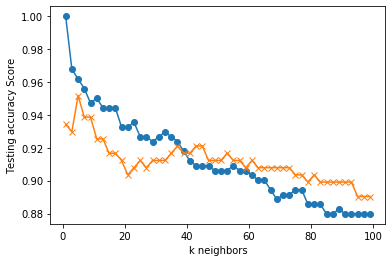

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

# Save the plot
plt.savefig("Images/knn_training_test.png")


plt.show()

In [14]:
error = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error.append(np.mean(pred_i != y_test))

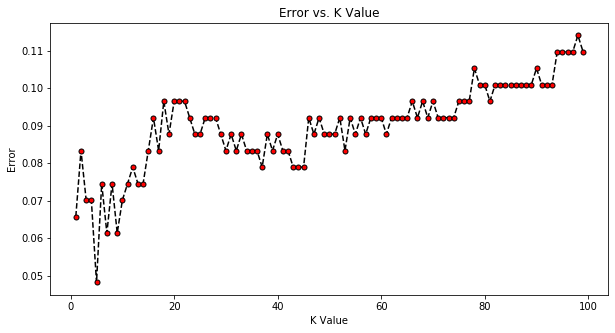

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100),error,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

# Save the plot
plt.savefig("Images/error_kvalue.png")

In [16]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [17]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
predictions = knn.predict(X_test_scaled)

In [19]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, precision_score

print(classification_report(y_test, predictions, digits=3))

cfm = confusion_matrix(y_test, predictions)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.934     0.993     0.963       143
           M      0.987     0.882     0.932        85

    accuracy                          0.952       228
   macro avg      0.961     0.938     0.947       228
weighted avg      0.954     0.952     0.951       228

Confusion Matrix: 
 [[142   1]
 [ 10  75]] 

True Negative: 142
False Positive: 1
False Negative: 10
True Positive: 75
Correct Predictions 95.2 %
